<a href="https://colab.research.google.com/github/AlkaBhambhu/Datathon_WomensMarch/blob/master/Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datathon

#Datathon

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('globalcount_data.csv')
df.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,...,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,...,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,...,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,...,Political,NaN,Political,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,1,0,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Ac

Creating gender & race fuction to group null values to 'undisclosed'

In [3]:
def gender_func(x):
    gender = []
    if x['gender_not_listed']:
        gender.append('not listed')
    if x['gender_choose_not_to_identify']:
        gender.append('undisclosed')
    if x['cisgender_man']:
        gender.append('cisgender man')
    if x['cisgender_woman']:
        gender.append('cisgender woman')
    if x['non_conforming_or_non_binary']:
        gender.append('non-binary')
    if x['transgender_man']:
        gender.append('transgender man')
    if x['transgender_woman']:
        gender.append('transgender woman')
    if x['man']:
        gender.append('man')
    if x['woman']:
        gender.append('woman')
    if gender == []:
        gender.append('undisclosed')
    
    return ', '.join(gender)

In [4]:
def race_func(y):
    race = []
    if y['white']:
        race.append('white')
    if y['asian']:
        race.append('asian')
    if y['south_asian']:
        race.append('south_asian')
    if y['southeast_asian']:
        race.append('southeast_asian')
    if y['pacific_islander']:
        race.append('pacific_islander')
    if y['north_african']:
        race.append('north_african')
    if y['native_hawaiian']:
        race.append('native_hawaiian')
    if y['native_american']:
        race.append('native_american')
    if y['middle_eastern']:
        race.append('middle_eastern')
    if y['indigenous_central_or_south_american']:
        race.append('indigenous_central_or_south_american')
    if y['indigenous']:
        race.append('indigenous')
    if y['choose_not_to_identify']:
        race.append('choose_not_to_identify')
    if y['hispanic_or_latinx']:
        race.append('hispanic_or_latinx')
    if y['black_or_of_african_descent']:
        race.append('black_or_of_african_descent')
    if y['biracial_or_mixed']:
        race.append('biracial_or_mixed')
    if y['racial_identity_not_listed']:
        race.append('racial_identity_not_listed')
    if race == []:
        race.append('undisclosed')
    
    if len(race) > 1:
        return 'multi-racial'
    return ', '.join(race)

In [5]:
df['race'] = df.apply(race_func, axis = 1)

In [6]:
df['gender_list'] = df.apply(gender_func, axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 94 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

There are two type of issues : personal & city.

In [8]:
issues_personal = df.columns[34:46]

In [9]:
issues_local = df.columns[58:70]

In [11]:
issues_all = issues_personal.append(issues_local)

Turning wide data into long data

In [12]:
df_long = df.melt(id_vars = [c for c in df.columns if c not in issues_personal], var_name = 'issue')

In [13]:
df_long = df.melt(id_vars = [c for c in df.columns if c not in issues_all], var_name = 'issue')

In [14]:
df_long.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,barrier_person_civil_rights_and_freedoms,barrier_person_disability_rights,barrier_person_economic_and_workers_rights,barrier_person_education_and_youth_empowerment,barrier_person_ending_violence_harassment_and_abuse,barrier_person_environmental_justice,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score,race,gender_list,issue,value
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,NaN,Cultural/Social,NaN,NaN,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,woman,issue_person_civil_rights_and_freedoms,0
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00,white,woman,issue_person_civil_rights_and_freedoms,0
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undisclosed,undisclosed,issue_person_civil_rights_and_freedoms,0
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97,racial_identity_not_listed,woman,issue_person_civil_rights_and_freedoms,0
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,NaN,NaN,Economic,NaN,NaN,NaN,Political,NaN,Political,NaN,NaN,NaN,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00,asian,not listed,issue_person_civil_rights_and_freedoms,0


In [22]:
response_per_country = df.groupby('country_of_residence')['unique_id'].count().sort_values(ascending = False).reset_index()
response_per_country.head(20)

,country_of_residence,unique_id
0,Switzerland,2335
1,Belarus,2151
2,Russian Federation,1913
3,Ukraine,1338
4,Kazakhstan,1320
5,United States of America,992
6,Kenya,946
7,Zimbabwe,929
8,Liberia,846
9,Nigeria,837


In [15]:
#breakdown by countries
df_analysis = df_long[['country_of_residence', 'issue', 'value']]
df_analysis.groupby(['country_of_residence', 'issue']).sum().sort_values(by = 'value', ascending = False)

value
country_of_residence issue                                                   
Switzerland          issue_person_ending_violence_harassment_and_abuse   1518
                     issue_person_racial_equity                          1398
Belarus              issue_person_civil_rights_and_freedoms              1384
Switzerland          issue_person_environmental_justice                  1367
Belarus              issue_person_ending_violence_harassment_and_abuse   1330
...                                                                       ...
Jamaica              issue_city_education_and_youth_empowerment             0
                     issue_city_ending_violence_harassment_and_abuse        0
                     issue_city_environmental_justice                       0
                     issue_city_immigrant_and_refugee_rights                0
Kuwait               issue_person_LGBTQI+_rights                            0

[3720 rows x 1 columns]

Code to check stats for individual countries



In [21]:
df_analysis.groupby(['country_of_residence', 'issue']).sum().groupby('country_of_residence').get_group('Myanmar')

value
country_of_residence issue                                                    
Myanmar              issue_city_LGBTQI+_rights                               1
                     issue_city_civil_rights_and_freedoms                    0
                     issue_city_disability_rights                            0
                     issue_city_economic_and_workers_rights                  0
                     issue_city_education_and_youth_empowerment              0
                     issue_city_ending_violence_harassment_and_abuse         1
                     issue_city_environmental_justice                        0
                     issue_city_immigrant_and_refugee_rights                 0
                     issue_city_indigenous_andor_roma_rights                 0
                     issue_city_racial_equity                                0
                     issue_city_reproductive_freedom_and_bodily_auto...      1
                     issue_city_sexual_reproductive_and_parental_health      0
                     issue_person_LGBTQI+_rights                             0
                     issue_person_civil_rights_and_freedoms                  0
                     issue_person_disability_rights                          0
                     issue_person_economic_and_workers_rights                0
                     issue_person_education_and_youth_empowerment            2
                     issue_person_ending_violence_harassment_and_abuse       2
                     issue_person_environmental_justice                      0
                     issue_person_immigrant_and_refugee_rights               0
                     issue_person_indigenous_andor_roma_rights               0
                     issue_person_racial_equity                              0
                     issue_person_reproductive_freedom_and_bodily_au...      1
                     issue_person_sexual_reproductive_and_parental_h...      1

In [23]:
#the most critical issues that survey respondents face globally 
df.iloc[:,34:71].sum().sort_values(ascending = False)

issue_person_ending_violence_harassment_and_abuse        15199
issue_person_education_and_youth_empowerment              9307
issue_person_civil_rights_and_freedoms                    7047
issue_person_environmental_justice                        5580
issue_person_economic_and_workers_rights                  5203
issue_person_racial_equity                                4692
issue_city_ending_violence_harassment_and_abuse           4193
issue_person_sexual_reproductive_and_parental_health      3864
issue_city_education_and_youth_empowerment                3046
issue_city_economic_and_workers_rights                    3009
issue_person_disability_rights                            2494
issue_person_reproductive_freedom_and_bodily_autonomy     2417
issue_person_LGBTQI+_rights                               2357
issue_city_civil_rights_and_freedoms                      2289
issue_city_environmental_justice                          2240
issue_person_immigrant_and_refugee_rights              

In [33]:
from scipy.spatial import distance

In [35]:
cm = df.iloc[:, 34:46].corr(method = distance.dice)

Used the Dice Similarity score between two logical vectors (Pearson’s r may not produce good results with logical vectors).

Lower the score, the more dissimilar the choices.


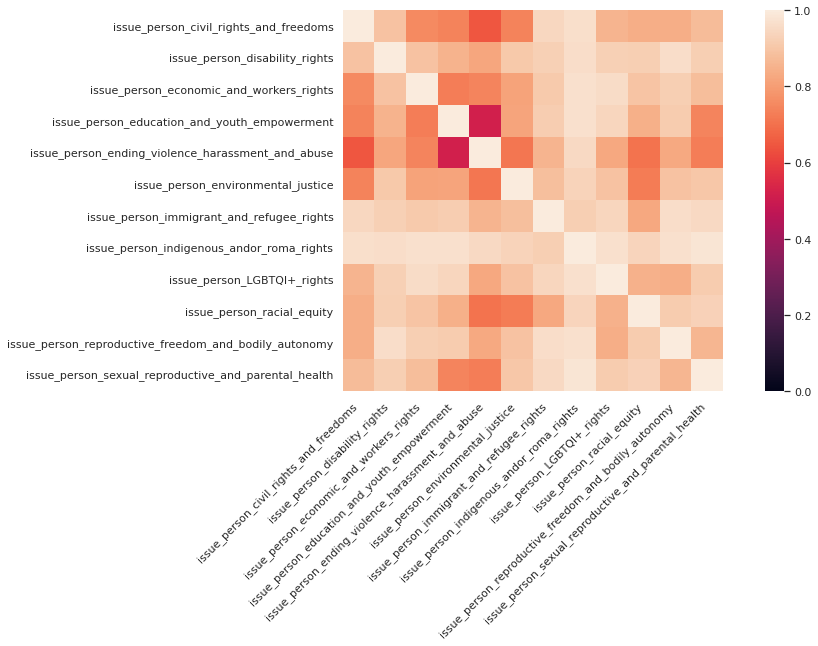

In [36]:
ax = sns.heatmap(
    cm, 
    vmin = 0, vmax = 1,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [26]:
pivot_df = df_long.pivot_table(index='country_of_residence', columns='issue', values='value', aggfunc='sum')

In [28]:
#getting top 10 countries per issue
pivot_df['issue_city_LGBTQI+_rights'].sort_values(ascending = False)[:10].reset_index()

,country_of_residence,issue_city_LGBTQI+_rights
0,Russian Federation,315
1,Switzerland,227
2,United States of America,108
3,Canada,52
4,United Kingdom of Great Britain and Northern I...,42
5,Germany,27
6,Botswana,24
7,Kenya,24
8,Zimbabwe,19
9,Brazil,17


In [25]:
#Responses by gender
df_gender = df.iloc[:,8:17]
df_gender.sum().sort_values(ascending = False)

woman                            17456
cisgender_woman                   1480
man                               1093
gender_choose_not_to_identify      457
non_conforming_or_non_binary       317
gender_not_listed                  160
transgender_woman                  157
cisgender_man                      102
transgender_man                     94
dtype: int64

In [29]:
#the most critical issues that survey respondents face by cisgender_woman
df_cisgender_woman = pd.concat([df.iloc[:,10], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_cisgender_woman[df_cisgender_woman.cisgender_woman == 1].sum().sort_values(ascending = False)

cisgender_woman                                          1480
issue_person_ending_violence_harassment_and_abuse         940
issue_city_ending_violence_harassment_and_abuse           443
issue_person_environmental_justice                        431
issue_person_reproductive_freedom_and_bodily_autonomy     428
issue_person_LGBTQI+_rights                               402
issue_person_racial_equity                                331
issue_city_economic_and_workers_rights                    318
issue_person_education_and_youth_empowerment              313
issue_person_sexual_reproductive_and_parental_health      303
issue_city_racial_equity                                  289
issue_city_environmental_justice                          255
issue_person_economic_and_workers_rights                  247
issue_city_immigrant_and_refugee_rights                   243
issue_city_education_and_youth_empowerment                223
issue_city_LGBTQI+_rights                                 221
issue_ci

In [30]:
#Responses by race
df_race = df.iloc[:,18:34]
df_race.sum().sort_values(ascending = False)

white                                   6833
black_or_of_african_descent             4760
asian                                   2073
indigenous                              1791
choose_not_to_identify                  1698
biracial_or_mixed                       1091
hispanic_or_latinx                      1083
north_african                            368
middle_eastern                           285
south_asian                              185
indigenous_central_or_south_american     177
southeast_asian                           97
native_american                           96
pacific_islander                          59
native_hawaiian                           48
dtype: int64

In [31]:
#the most critical issues that survey respondents face by asian
df_asian = pd.concat([df.iloc[:,18], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
df_asian[df_asian.asian == 1].sum().sort_values(ascending = False)

asian                                                    2073
issue_person_ending_violence_harassment_and_abuse        1347
issue_person_education_and_youth_empowerment              766
issue_person_economic_and_workers_rights                  328
issue_person_environmental_justice                        327
issue_person_racial_equity                                242
issue_person_sexual_reproductive_and_parental_health      216
issue_person_LGBTQI+_rights                               156
issue_person_reproductive_freedom_and_bodily_autonomy     144
issue_person_immigrant_and_refugee_rights                 133
issue_person_disability_rights                            124
issue_city_ending_violence_harassment_and_abuse           120
issue_city_economic_and_workers_rights                     87
issue_city_education_and_youth_empowerment                 76
issue_city_environmental_justice                           56
issue_city_racial_equity                                   55
issue_ci

In [37]:
#the most critical issues that survey respondents face by age
df_age = pd.concat([df.iloc[:,33], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1).groupby('age').sum().head().reset_index(0)
df_age.transpose()

,0,1,2,3,4
age,18 to 24,25 to 34,35 to 44,45 to 54,55 to 64
issue_person_disability_rights,493,519,325,275,198
issue_person_economic_and_workers_rights,854,1103,814,615,535
issue_person_education_and_youth_empowerment,2433,2305,1218,813,508
issue_person_ending_violence_harassment_and_abuse,4049,3522,1878,1220,915
issue_person_environmental_justice,1170,1025,652,495,572
issue_person_immigrant_and_refugee_rights,381,431,268,194,162
issue_person_indigenous_andor_roma_rights,95,111,81,61,84
issue_person_LGBTQI+_rights,1046,423,161,95,84
issue_person_racial_equity,1001,871,538,406,368


In [38]:
#combining race & gender
#Responses by black transgender
response_black_trans = pd.concat([df.iloc[:,14],df.iloc[:,20], df.iloc[:,35:47], df.iloc[:,59:71]], axis=1)
response_black_trans[response_black_trans.black_or_of_african_descent ==1].groupby('black_or_of_african_descent').sum().transpose()

black_or_of_african_descent,1
transgender_man,46
issue_person_disability_rights,503
issue_person_economic_and_workers_rights,882
issue_person_education_and_youth_empowerment,2896
issue_person_ending_violence_harassment_and_abuse,3349
issue_person_environmental_justice,424
issue_person_immigrant_and_refugee_rights,348
issue_person_indigenous_andor_roma_rights,83
issue_person_LGBTQI+_rights,174
issue_person_racial_equity,790


Barriers for each issue

In [39]:
df.groupby('barrier_person_ending_violence_harassment_and_abuse').count().unique_id

barrier_person_ending_violence_harassment_and_abuse
Cultural/Social    6713
Economic            688
Education          1518
Political          3024
Technological       138
Name: unique_id, dtype: int64

Random forest to check variable importance across issues

In [40]:
analysis = df.iloc[:, 8:46]
analysis.columns

Index(['gender_not_listed', 'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary', 'gender_choose_not_to_identify', 'man',
       'transgender_man', 'transgender_woman', 'woman',
       'racial_identity_not_listed', 'asian', 'biracial_or_mixed',
       'black_or_of_african_descent', 'hispanic_or_latinx',
       'choose_not_to_identify', 'indigenous',
       'indigenous_central_or_south_american', 'middle_eastern',
       'native_american', 'native_hawaiian', 'north_african',
       'pacific_islander', 'south_asian', 'southeast_asian', 'white', 'age',
       'issue_person_civil_rights_and_freedoms',
       'issue_person_disability_rights',
       'issue_person_economic_and_workers_rights',
       'issue_person_education_and_youth_empowerment',
       'issue_person_ending_violence_harassment_and_abuse',
       'issue_person_environmental_justice',
       'issue_person_immigrant_and_refugee_rights',
       'issue_person_indigenous_andor_roma_rights',
       'issue_pers

In [41]:
demographic_cols = analysis.columns[:26]
target_cols = analysis.columns[27:]

In [42]:
analysis = pd.get_dummies(analysis)

In [43]:
train_set = analysis[[c for c in analysis.columns if c in demographic_cols]]
target = analysis[target_cols[1]]

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
 clf=RandomForestClassifier(n_estimators = 300, criterion = 'gini')

In [47]:
clf.fit(train_set, target)
feature_imp = pd.Series(clf.feature_importances_, index= train_set.columns).sort_values(ascending=False)

Text(0.5, 1.0, 'Visualizing Important Features for issue person economic and workers rights')

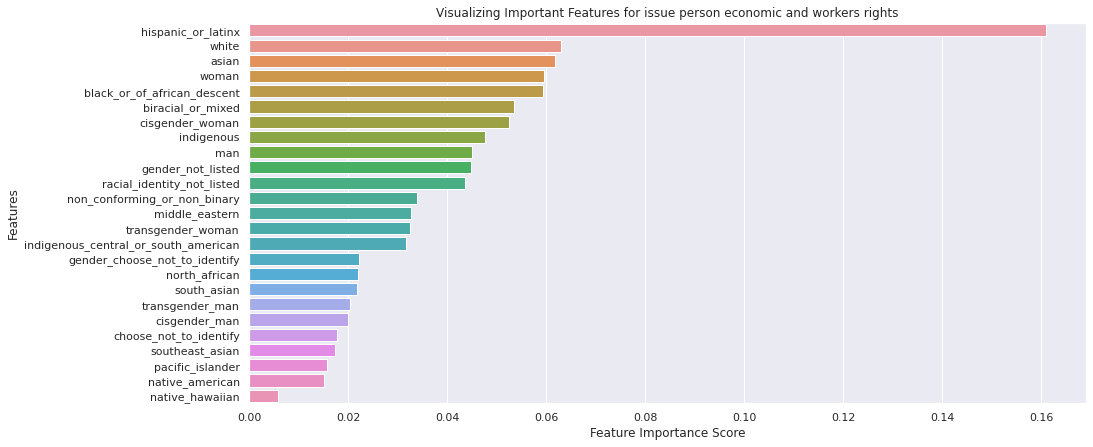

In [48]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for " + ' '.join(target_cols[1].split('_')))

A word cloud (also known as a tag cloud) is a technique of summarizing vast amounts of text. The words featured in the Wordcloud are chosen based on frequency and relevance.

In [54]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud

(-0.5, 1599.5, 799.5, -0.5)

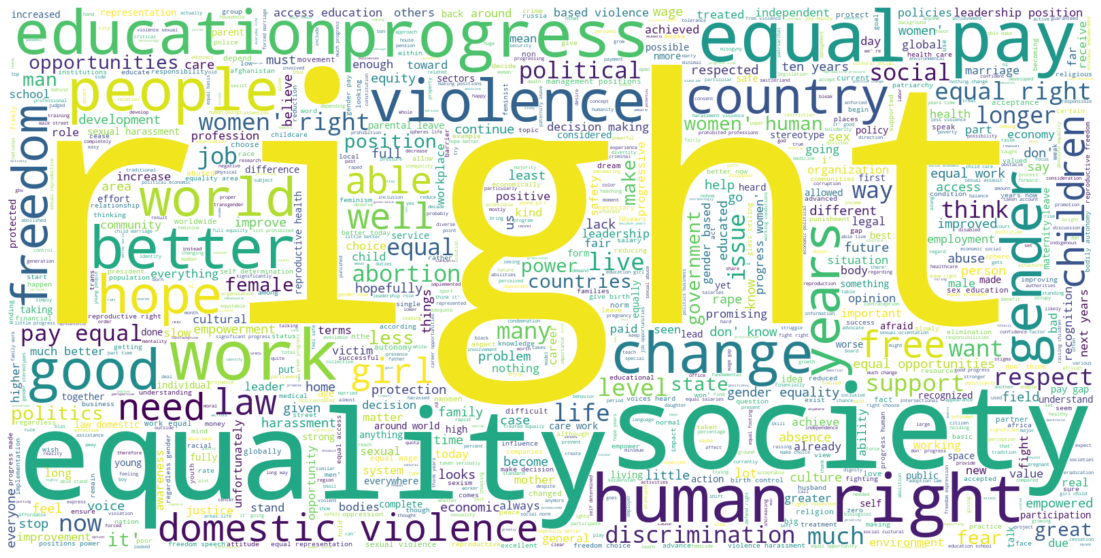

In [55]:
df['text'] = df['progress_10_years_tr'].fillna(value = '')

stopwords = set(STOPWORDS)
stopwords.update(["dtype", "object", "name", "progress_10_years_tr", "women","n", "won't", "don't", "year", "10", "women'`s", "will", "every", "especially", "u", "thing", "ten years", "sector", "next years", "term", "without", "really", "etc", "finally", "take", "including", "number", "see", "end", "still", "number", "one", "s right", "even", "look", "may", "come", "place", "woman", "men"])

word_string= " ".join(df['text'].str.lower())
plt.figure(figsize=(20,10))
#WC = WordCloud(stopwords = stopwords, max_font_size=350, max_words=2000, background_color="white", width=1600, height=1600).generate(str(word_string))
WC = WordCloud(stopwords = stopwords, max_font_size=500, max_words=1000, background_color="white", width=1600, height=800).generate(word_string)
plt.imshow(WC, interpolation='bilinear')

plt.axis("off")